In [1]:
include("../src/QStirlingEngine.jl")
using .QStirlingEngine
using LinearAlgebra
using Random
using DifferentialEquations
using Plots

In [20]:
tspan = (0., 10.)

rΔp, ωm, G, Th, Tc, γh, γc = rand(Float64, (7))
print("$rΔp, $ωm, $G, $Th, $Tc, $γh, $γc")
Δp = t -> rΔp+rΔp*10^(-5)*t

ρ0 = [4.08869024190911 0.3020135004112786 -2.6885011832628827 -0.4528955715802489
      0.3020135004112787 3.0426737415267766 0.21373970846112722 4.438387229442656
      -2.6885011832628827 0.21373970846112744 1.8910786497021073 0.9534619295961205
      -0.45289557158024896 4.438387229442656 0.9534619295961203 6.981967317786721]

P = evalP(Δp, ωm, G)
M = evalM(Δp, ωm, G, Th, Tc, γh, γc)
C = evalC(Δp, ωm, G, Th, Tc, γh, γc)

u0matrix = transpose(P(0))*ρ0*P(0)
u0 = [u0matrix[1,1], u0matrix[2,2], u0matrix[1,2], u0matrix[3,3], u0matrix[4,4], u0matrix[3,4], u0matrix[1,4], u0matrix[2,3], u0matrix[1,3], u0matrix[2,4]];

0.7349199997742334, 0.5512018461444793, 0.7154219363767458, 0.9746732996304396, 0.8412411541825279, 0.21359313000077096, 0.41354495233398103

In [21]:
function f(du, u, par, t)
    du .= M(t)*u + C(t)
end
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Rosenbrock23(), abstol=1e-8, reltol=1e-8, maxiters=Int(1e7), dt=0.00001);

In [22]:
cov = zeros(Float64, (length(sol.t), 10))
for j in 1:10
    cov[:, j] = [sol.u[i][j] for i in eachindex(sol.t)]
end

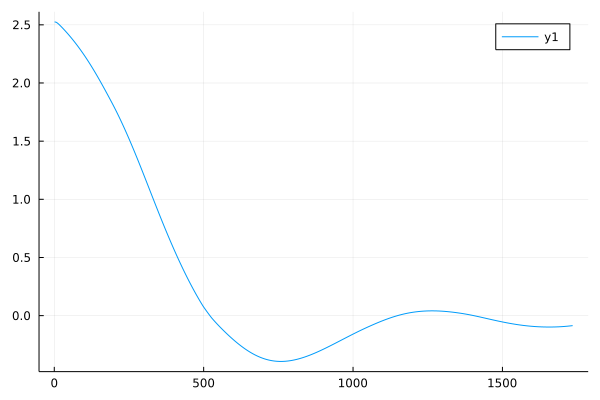

In [31]:
plot(cov[:,10])